In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Generate data

In [2]:
# grid
n = 500
x = np.linspace(0,1,n)
xx,yy = np.meshgrid(x,x)

# generate u with covariance C
Cm = np.exp(-np.abs(xx - yy)**1/(0.5))

u = np.random.multivariate_normal(np.zeros(n),Cm)

In [4]:
# Define G
K = np.linalg.matrix_power(0.5*np.diag(np.ones(n)) + 0.25*np.diag(np.ones(n-1),k=-1) + 0.25*np.diag(np.ones(n-1),k=1),250)

# data
sigma = 1e-3
Cd = sigma*np.eye(n)
f = np.random.multivariate_normal(K@u,Cd)

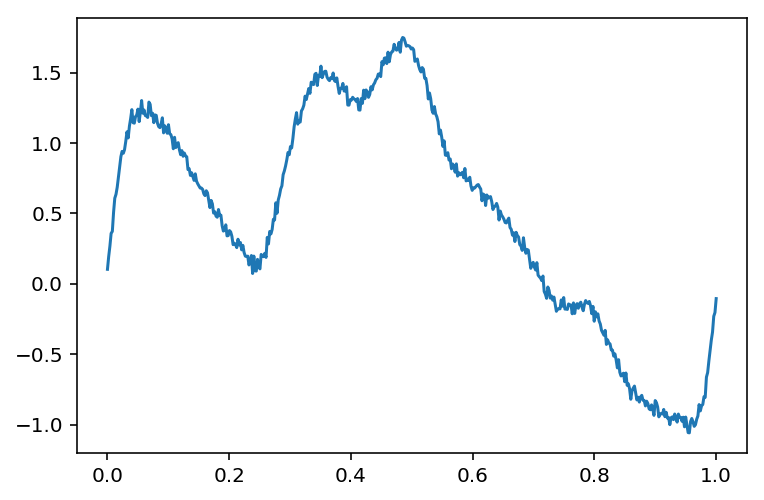

In [5]:
plt.plot(x,f)

# Inversion

In [6]:
# define operators
Cm = np.exp(-np.abs(xx - yy)**1/(0.5))
Cd = np.eye(n)
K = np.linalg.matrix_power(0.5*np.diag(np.ones(n)) + 0.25*np.diag(np.ones(n-1),k=-1) + 0.25*np.diag(np.ones(n-1),k=1),50)

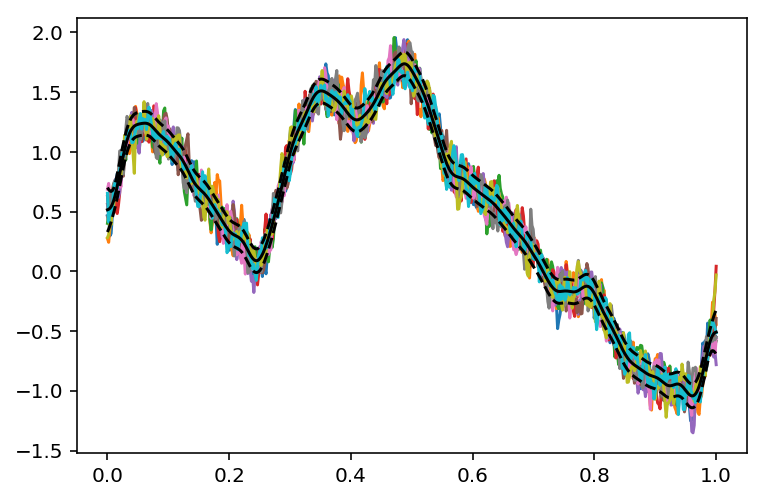

In [12]:
alpha = 0.01

# posterior mean
up = Cm@K.T@np.linalg.inv(K@Cm@K.T + alpha*Cd)@f

# posterior covariance
Cp = Cm - Cm@K.T@np.linalg.inv(K@Cm@K.T + alpha*Cd)@K@Cm

# draw samples
us = np.random.multivariate_normal(up,Cp,10)

# plot
plt.plot(x,us.T)
plt.plot(x,up,'k')
plt.plot(x,up + np.sqrt(np.diag(Cp)),'k--')
plt.plot(x,up - np.sqrt(np.diag(Cp)),'k--')

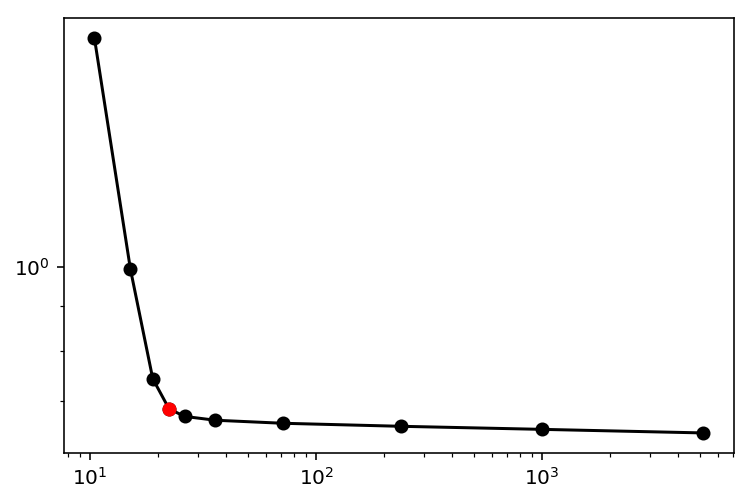

In [10]:
# L-curve
ns = 10
a = np.logspace(-6,0,ns)
nk = np.zeros(ns)
rk = np.zeros(ns)
for k in range(ns):
    uk = Cm@K.T@np.linalg.inv(K@Cm@K.T + a[k]*Cd)@f
    nk[k] = np.dot(np.linalg.inv(Cm)@uk,uk)
    rk[k] = np.linalg.norm(K@uk - f)
plt.loglog(nk,rk,'k-o')
plt.loglog(nk[6],rk[6],'ro')

In [11]:
a[6]

0.01

(array([   4.,   18.,   39.,   78.,   92.,  113.,   83.,   43.,   24.,    6.]),
 array([-0.08762024, -0.07050998, -0.05339971, -0.03628945, -0.01917919,
        -0.00206892,  0.01504134,  0.03215161,  0.04926187,  0.06637214,
         0.0834824 ]),
 <a list of 10 Patch objects>)

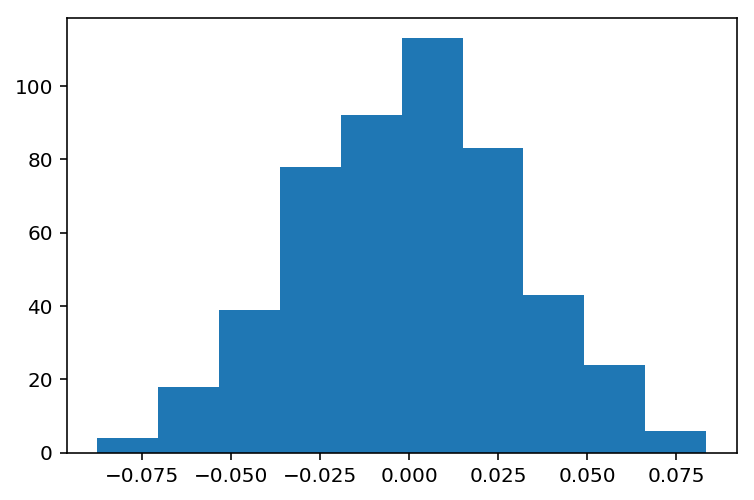

In [13]:
# residual
r = K@up-f
plt.hist(r,10)

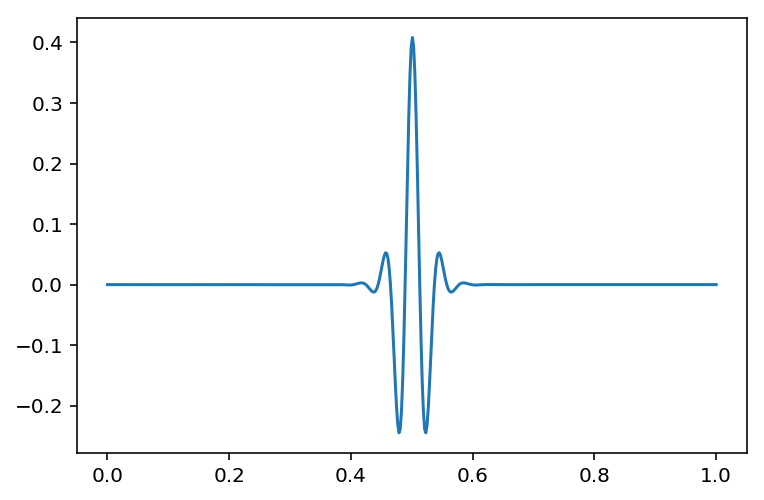

In [145]:
# Resolution operator
R = K.T@np.linalg.inv(K@Cm@K.T + alpha*Cd)@K

plt.plot(x,R[:,int(n/2)])

# Final comparison

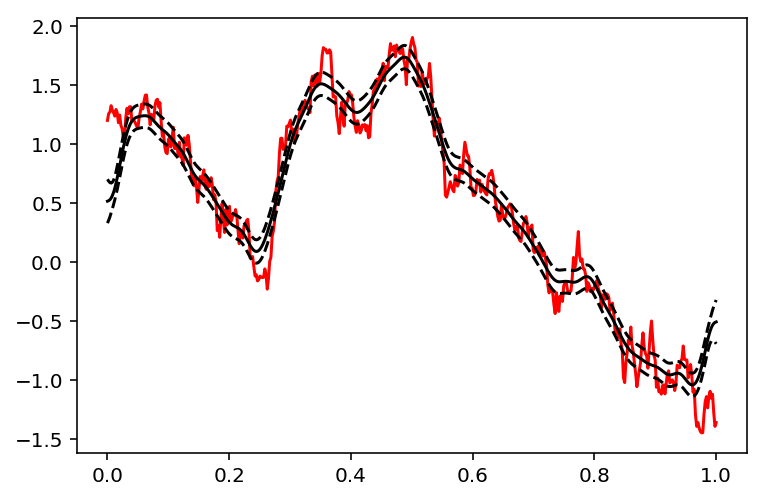

In [14]:
# ground truth
plt.plot(x,u,'r')
plt.plot(x,up,'k')
plt.plot(x,up + np.sqrt(np.diag(Cp)),'k--')
plt.plot(x,up - np.sqrt(np.diag(Cp)),'k--')